In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandas is a software library for data manipulation and analysis
# We commonly use shorter nicknames for certain packages. Pandas is often abbreviated to pd.
# hit shift + enter to run this cell or block of code
# posts file path
posts_file = "C:\Users\speng\IdeaProjects\LeadsCrawling\job\\result\posts.csv"
posts_df = pd.read_csv(posts_file)
comments_file = "C:\Users\speng\IdeaProjects\LeadsCrawling\job\comments.csv"
comments_df = pd.read_csv(comments_file)
members_file = "C:\Users\speng\IdeaProjects\LeadsCrawling\job\members.csv"
members_df = pd.read_csv(members_file)

In [3]:
# Count of posts
print posts_df.count()


title              183207
author             183368
replies            169422
last_reply_time    183368
href               183368
dtype: int64


In [4]:
# the number of authots id 
print len(posts_df['author'].unique())

57895


In [5]:
# count posts for each author
# top 10
print posts_df.groupby('author').count().sort('href',ascending=False).head(10)

                title  replies  last_reply_time  href
author                                               
44636442          395      374              395   395
indelebile        284      273              284   284
133836717         279      239              279   279
S.oner            246      244              246   246
Simonsaye         237      224              237   237
124134093         218       25              218   218
69484083          208       29              208   208
39042514          207      194              207   207
vinvella          201      189              201   201
kisminekayking    193      192              193   193


In [28]:
# find out posts send by top 1 author heiheihei
print posts_df[posts_df.author == "44636442"]

                           title    author  replies last_reply_time  \
44734                  嘿嘿嘿,来个帅T吧  44636442       14      2015-02-14   
55960             有没有女人,后腰有两个凹陷的  44636442       66      2014-10-13   
91008                     求英文名字,  44636442        2      2013-09-16   
93072                妇科医生能看出LES么  44636442       44      2013-08-16   
96068         你们最近买了神马衣服,敢不敢上链接！  44636442       12      2013-07-12   
98267             老T性欲强小P吃不消怎么办?  44636442       27      2013-06-10   
98413            年纪大的T性欲强小PP怎么办?  44636442        3      2013-06-08   
103100      如果EX升到你的顶头上司,你会不会辞职?  44636442       43      2013-04-04   
105271           你喜欢的T喜欢一个丑P你怎么办  44636442       80      2013-03-06   
105401        我觉得我是一粒尘埃,被扔在渺茫宇宙.  44636442        5      2013-03-04   
106344            虽然是大婶,依然希望做清新P  44636442       16      2013-02-18   
106463                   还是现任适合我  44636442        7      2013-02-16   
106542        回答问题...随便问什么..你们问吧  44636442       15      2013-02-15   
106550

2016-05-07 19:41:00
last_reply_time
2006      124
2007      792
2008     1899
2009    12647
2010    17891
2011    20907
2012    19677
2013    26263
2014    34501
2015    35279
2016    13388
Name: href, dtype: int64
Populating the interactive namespace from numpy and matplotlib


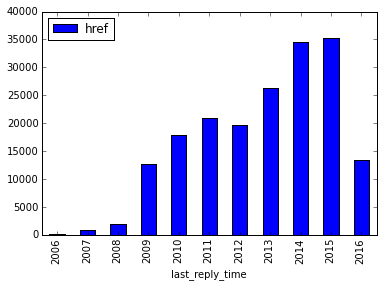

In [6]:
posts_df['last_reply_time'] = pd.to_datetime(posts_df['last_reply_time'])
print posts_df['last_reply_time'].max()
# histgram of posts number in each year
year_df = posts_df.groupby(posts_df['last_reply_time'].map(lambda x:x.year)).count('href')
print year_df['href']
%pylab inline
plt.figure()
year_df.plot(kind='bar',x=year_df.index,y='href')

last_reply_time
1     14892
2     15042
3     15753
4     16686
5     16046
6     13552
7     14297
8     16033
9     14146
10    15608
11    14716
12    16597
Name: href, dtype: int64
Populating the interactive namespace from numpy and matplotlib


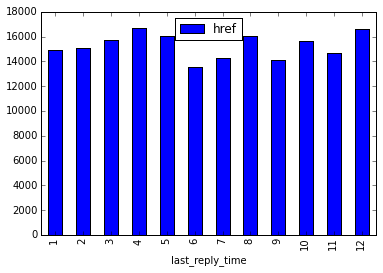

In [49]:
# histgram of posts number binning by month
month_df = posts_df.groupby(posts_df['last_reply_time'].map(lambda x:x.month)).count('href')
print month_df['href']
%pylab inline
plt.figure()
month_df.plot(kind='bar',x=month_df.index,y='href')

In [64]:
# count posts contain special key words
print posts_df[(posts_df['title'].fillna('').str.contains('蒸')) | posts_df['title'].fillna('').str.contains('征')].count()

print posts_df[(posts_df['title'].fillna('').str.contains('前任'))  | posts_df['title'].fillna('').str.contains('ex',case=False)].count()

print posts_df[(posts_df['title'].fillna('').str.contains('分'))].count()

title              13250
author             13250
replies            12300
last_reply_time    13250
href               13250
dtype: int64
title              1727
author             1727
replies            1692
last_reply_time    1727
href               1727
dtype: int64
title              3886
author             3886
replies            3665
last_reply_time    3886
href               3886
dtype: int64


In [73]:
print posts_df.fillna(0).sort('replies', ascending=False)[['href','replies','title']].head(10)

                                                href  replies  \
911     https://www.douban.com/group/topic/16153747/   204953   
1966    https://www.douban.com/group/topic/53153624/    50867   
32      https://www.douban.com/group/topic/17505748/    38676   
103193  https://www.douban.com/group/topic/16812408/    36926   
81067   https://www.douban.com/group/topic/14299885/    32930   
73740   https://www.douban.com/group/topic/36043315/    32503   
182     https://www.douban.com/group/topic/75297183/    25184   
33      https://www.douban.com/group/topic/79648267/    24321   
101115  https://www.douban.com/group/topic/14883064/    20938   
128507  https://www.douban.com/group/topic/19500149/    20036   

                                                  title  
911                                           交通广播每日路况。  
1966    【勿转载谢谢】感觉一个实习妹子和她上级有点猫腻。。/现实纠缠还是憋停了눈_눈 【吱吱吱猴赛雷…  
32                                                【点楼】.  
103193                                         ～~—鱼馆

In [77]:
#distribution of comments number of posts
print posts_df.fillna(0)['replies'].describe()

count    183368.000000
mean         57.246281
std         588.419785
min           0.000000
25%           5.000000
50%          16.000000
75%          47.000000
max      204953.000000
Name: replies, dtype: float64


In [132]:
print comments_df.columns
print comments_df['comment_id'].count()
print len(comments_df['comment_id'].unique())
# remove duplicated comments
comments_df = comments_df.drop_duplicates('comment_id', take_last=True)
print comments_df['comment_id'].count()
print len(comments_df['post_id'].unique())
print len(comments_df['user_id'].unique())

Index([u'post_id', u'user_id', u'comment_id', u'pub_time'], dtype='object')
1475623
1475623
1475623
17044
52105


In [117]:
comments_df['pub_time'] = pd.to_datetime(comments_df['pub_time'])
def get_days_between_first_and_last_comments(group):
    first_comment_time = group['pub_time'].min()
    last_comment_time = group['pub_time'].max()
    return (last_comment_time - first_comment_time).days

comments_live_days_df = comments_df.groupby('post_id').apply(get_days_between_first_and_last_comments).order(ascending=False)
print comments_live_days_df.head(10)
print comments_live_days_df.describe()


post_id
1230298    3410
1241657    3350
1293657    3312
1537344    3299
2181018    2935
3053595    2814
4817479    2694
5293430    2576
5788864    2440
7677802    2427
dtype: int64
count    17044.000000
mean        53.460103
std        210.065444
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max       3410.000000
dtype: float64


pub_time
0     105650
1      58133
2      29568
3      15238
4       9157
5       7066
6      10536
7      21482
8      36883
9      55271
10     66215
11     68023
12     64398
13     69061
14     66264
15     66192
16     68486
17     62717
18     60331
19     70527
20     85355
21    106539
22    130117
23    142414
Name: comment_id, dtype: int64
Populating the interactive namespace from numpy and matplotlib


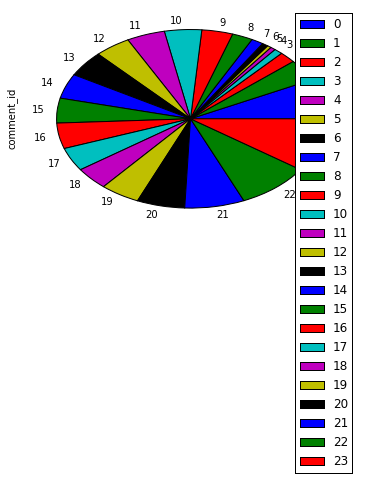

In [123]:
comments_hourly_df = comments_df.groupby(comments_df['pub_time'].map(lambda x:x.hour)).count('comment_id')
print comments_hourly_df['comment_id']
%pylab inline
plt.figure()
comments_hourly_df.plot(kind='pie',x=comments_hourly_df.index,y='comment_id')

In [133]:
# top 10 users commenting posts
print comments_df[['user_id', 'comment_id']].groupby('user_id').count().sort('comment_id',ascending=False).head(10)

                comment_id
user_id                   
misszhao7            20851
89619388             20009
102934272             8945
41924809              6863
jcx_eleven            6302
travellingmind        6253
moleizhizhu           4966
4382644               4592
77844031              4019
51245672              3980


In [145]:
print members_df.columns
print members_df.count()
print len(members_df['username'].unique())


Index([u'user_id', u'username', u'location'], dtype='object')
user_id     190199
username    190188
location    128475
dtype: int64
156341


In [153]:
print members_df[['user_id','username']].groupby('username').count('user_id').sort('user_id',ascending=False).head(20)
print members_df[members_df['username'] == '[已注销]']

          user_id
username         
[已注销]         857
。             178
L             119
已注销           108
summer        106
.             106
S              88
               88
M              80
?              77
豆豆             73
-              69
木木             60
J              57
123            57
Summer         57
sunshine       55
seven          55
K              53
Z              53
                user_id username       location
122           145520298    [已注销]             上海
180           145488725    [已注销]            NaN
509           145395520    [已注销]            NaN
745           139961250    [已注销]             北京
780           145321341    [已注销]             北京
868           136364473    [已注销]             北京
916           139066837    [已注销]             南京
967            55818097    [已注销]            NaN
1046          145201436    [已注销]             杭州
1068           49647558    [已注销]             上海
1246          145123304    [已注销]             北京
1248          144646694    [

In [152]:
print members_df[['user_id','location']].groupby('location').count('user_id').sort('user_id',ascending=False)

                              user_id
location                             
北京                              20591
上海                              13872
广州                               6228
成都                               5698
深圳                               5019
杭州                               4650
武汉                               4243
南京                               3828
重庆                               3359
西安                               3248
长沙                               2773
天津                               2415
苏州                               2093
郑州                               1544
厦门                               1287
青岛                               1254
沈阳                               1237
大连                               1232
哈尔滨                              1211
合肥                               1184
济南                               1117
福州                               1034
昆明                                936
宁波                                893
长春          